In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Read file


In [2]:
df= pd.read_csv('paris_temperature.csv')
df.head(2)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Paris,France",2023-10-01,26.5,12.5,18.9,26.5,12.5,18.9,13.7,74.3,...,3.5,3,10,2023-10-01T07:49:34,2023-10-01T19:30:27,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"07149099999,07156099999,07146099999,0715709999..."
1,"Paris,France",2023-10-02,27.7,14.5,20.7,27.9,14.5,20.7,14.7,71.0,...,4.4,4,10,2023-10-02T07:51:01,2023-10-02T19:28:21,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"07149099999,07156099999,07146099999,0715709999..."


In [3]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.802356,10.096859,13.279319,16.541623,8.974869,12.624346,8.784293,76.118586,2.053552,71.432461,...,18.495550,209.079843,1013.928796,79.876178,19.180628,49.813874,4.296335,2.913613,10.746073,0.481990
std,6.840083,5.057506,5.819955,7.388110,6.197290,6.674208,4.779705,10.214621,3.939574,44.425978,...,6.069653,87.970190,10.349025,19.049478,4.334291,37.130885,3.214728,2.267046,5.473000,0.289633
min,-1.300000,-4.100000,-1.800000,-5.500000,-7.300000,-6.300000,-6.100000,51.600000,0.000000,0.000000,...,6.800000,0.400000,979.700000,13.000000,5.100000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,11.800000,6.625000,9.300000,11.800000,4.600000,8.025000,6.200000,68.600000,0.000000,0.000000,...,13.900000,180.750000,1008.900000,71.200000,16.800000,16.825000,1.400000,1.000000,10.000000,0.242500
50%,16.150000,10.200000,13.050000,16.150000,10.200000,13.050000,9.150000,76.750000,0.195000,100.000000,...,17.850000,222.000000,1014.650000,85.600000,20.300000,43.500000,3.800000,2.000000,10.000000,0.480000
75%,21.850000,13.600000,17.575000,21.850000,13.600000,17.575000,12.175000,84.475000,2.143000,100.000000,...,21.975000,265.675000,1019.900000,94.075000,22.100000,76.325000,6.500000,4.000000,10.000000,0.750000
max,36.200000,21.200000,28.300000,39.000000,21.200000,29.600000,20.300000,95.000000,25.008000,100.000000,...,44.300000,358.200000,1042.800000,100.000000,39.100000,169.800000,14.700000,8.000000,75.000000,0.980000


# Missing data and outlier?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              382 non-null    object 
 1   datetime          382 non-null    object 
 2   tempmax           382 non-null    float64
 3   tempmin           382 non-null    float64
 4   temp              382 non-null    float64
 5   feelslikemax      382 non-null    float64
 6   feelslikemin      382 non-null    float64
 7   feelslike         382 non-null    float64
 8   dew               382 non-null    float64
 9   humidity          382 non-null    float64
 10  precip            382 non-null    float64
 11  precipprob        382 non-null    float64
 12  precipcover       382 non-null    float64
 13  preciptype        308 non-null    object 
 14  snow              382 non-null    float64
 15  snowdepth         382 non-null    float64
 16  windgust          382 non-null    float64
 1

In [5]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 name                 0
datetime             0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype          74
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex              0
severerisk           0
sunrise              0
sunset               0
moonphase            0
conditions           0
description          0
icon                 0
stations            14
dtype: int64


In [6]:
df[['preciptype','stations']]

,preciptype,stations
0,rain,"07149099999,07156099999,07146099999,0715709999..."
1,NaN,"07149099999,07156099999,07146099999,0715709999..."
2,rain,"07149099999,07156099999,07146099999,LFPV,07157..."
3,rain,"07149099999,07156099999,07146099999,LFPV,07145..."
4,rain,"07149099999,07156099999,07146099999,LFPV,07145..."
...,...,...
377,rain,NaN
378,rain,NaN
379,rain,NaN
380,rain,NaN


In [7]:
# Check precipitation type
df['preciptype'].value_counts()

rain                      301
rain,snow                   6
rain,freezingrain,snow      1
Name: preciptype, dtype: int64

In [8]:
df['stations'].value_counts()

07149099999,07156099999,07146099999,07157099999,C1292,07147099999,07150099999                                           247
07149099999,07156099999,07146099999,07145099999,07157099999,C1292,07147099999,07150099999                                36
07149099999,07156099999,07146099999,LFPV,07157099999,C1292,07147099999,LFPO,07150099999,LFPB                             18
07149099999,07156099999,07146099999,07157099999,C1292,07147099999,07150099999,D3623                                      12
LFPV,C1292,LFPO,LFPB                                                                                                     10
07149099999,07156099999,07146099999,07153099999,07157099999,C1292,07147099999,07150099999                                 6
07149099999,07156099999,07146099999,LFPV,07145099999,07153099999,07157099999,C1292,07147099999,LFPO,07150099999,LFPB      6
07149099999,07156099999,07146099999,07157099999,07147099999,C1292,07150099999,D3623                                       5
07149099

In [9]:
# Fill missing values in the 'station' column with mode
df['stations'] = df['stations'].fillna(df['stations'].mode()[0])

In [10]:
# Fill missing values in 'preciptype' based on the specified conditions
df.loc[(df['preciptype'].isnull()) & (df['snow'] == 0) & (df['precipprob'] == 0), 'preciptype'] = 'No preciptype'
df.loc[(df['preciptype'].isnull()) & (df['snow'] > 0), 'preciptype'] = 'rain,snow'
df.loc[(df['preciptype'].isnull()) & (df['precipprob'] > 0), 'preciptype'] = 'rain'

# Display the number of missing values in 'preciptype' after filling
df['preciptype'].isnull().sum()

0

In [11]:
df.isnull().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

# Check datetime

In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

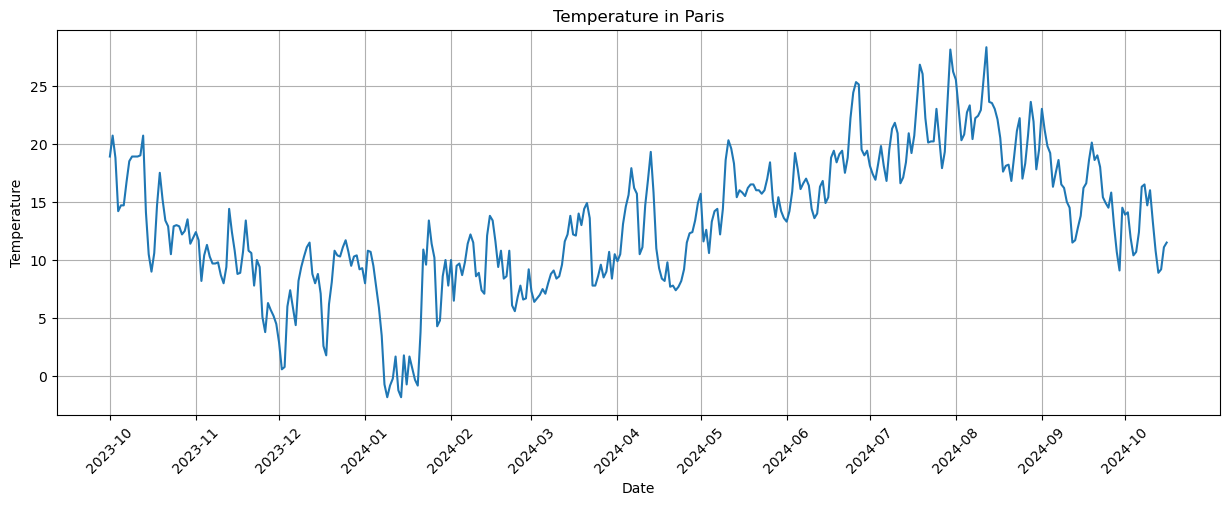

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['temp'])
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature in Paris")
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS').to_pydatetime(), [date.strftime('%Y-%m') for date in pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')], rotation=45)
plt.grid()
plt.show()

# The dataset has 33 columns (features). Explain the meaning and values in each column.

In [14]:
df.columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')


| Feature       | Meaning                                              | Values                                     |
|--------------|------------------------------------------------------|--------------------------------------------|
| name        | The location of the recorded weather                | All are "Paris, France"                   |
| datetime    | The date (without time) in ISO 8601 format (YYYY-MM-DD) | Ranging from October 1st, 2023 to October 16th, 2024 |
| tempmax     | The maximum recorded temperature                    | From -1.3 to 36.2°C                        |
| tempmin     | The minimum recorded temperature                    | From -4.1 to 21.2°C                        |
| temp        | The average temperature of the day                  | From -1.8 to 28.3°C                        |
| feelslikemax| The maximum "feels like" temperature of the day     | From -5.5 to 39.0°C                        |
| feelslikemin| The minimum "feels like" temperature of the day     | From -7.3 to 21.2°C                        |
| feelslike   | The average "feels like" temperature of the day     | From -6.3 to 29.6°C                        |
| dew         | The atmospheric temperature below which water droplets begin to condense | From -6.1 to 20.3°C |
| humidity    | A quantity representing the amount of water vapor in the atmosphere | From 51.6% to 95.0% |
| precip            | The amount of water falling from the sky (rain, drizzle, snow, sleet, hail, etc.) | From 0.0 to 25.008 mm                     |
| precipprob        | The probability of precipitation (possibly recorded after precipitation occurred) | 0 if no precipitation, 100 otherwise      |
| precipcover       | The percentage of the area that received precipitation | 0 if no precipitation; 3.2% to 100% for others |
| preciptype        | The type of precipitation | Empty for no precipitation; possible values: "rain", "rain,snow", or "rain,freezingrain,snow" |
| snow              | The amount of snow recorded | 0 for days without snow; 0.1 to 5.4 mm    |
| snowdepth         | The depth of snow on the ground | 0 for most days without snow; 0.1 to 3.9 mm |
| windgust          | The maximum wind gust speed recorded | From 14.4 to 92.2 (unknown unit)         |
| windspeed         | The average sustained wind speed recorded | From 6.8 to 44.3 (unknown unit)         |
| winddir           | The direction of the wind | In compass degrees (0-360)               |
| sealevelpressure  | The atmospheric pressure at mean sea level | From 979.7 to 1042.8 (unknown unit)      |
| cloudcover        | The percentage of cloud cover | From 13.0% to 100.0%                     |
| visibility        | The measure of the distance at which an object or light can be clearly discerned | From 5.1 to 39.1 (unknown unit)          |
| solarradiation    | The recorded value of solar radiation | From 0.0 to 169.8                        |
| solarenergy       | The total energy released from the sun that is absorbed in the recorded area | From 0.0 to 14.7                         |
| uvindex      | The UV index indicating the strength of ultraviolet radiation from the sun | Integer values from 0 to 8 |
| severerisk   | A risk rating indicating the severity of weather conditions | All entries have the value of 10 |
| sunrise      | The time of sunrise | Recorded in ISO 8601 format (YYYY-MM-DDThh:mm:ss) |
| sunset       | The time of sunset | Recorded in ISO 8601 format (YYYY-MM-DDThh:mm:ss) |
| moonphase    | The shape of the visible moon (moon phase) | Ratio of visible moon area; 0 for new moon, 1 for full moon |
| conditions   | A summary of the weather conditions | Contains type(s) of precipitation and cloud amount |
| description  | A detailed description of the daily weather | Text describing the weather of the recorded day |
| icon         | An icon representing the dominant weather conditions | String that indicates the weather type |
| stations     | A list of weather stations that provided the data | CSV list of strings identifying the stations |





# Identify numerical and categorical features

In [15]:
# check for repeated values in the categorical if the number of un
categorical_columns_to_check = ['preciptype', 'conditions', 'description', 'icon']
for column in categorical_columns_to_check:
    print("Value counts for column", column, "are: \n", df[column].value_counts())
    print("\n")

Value counts for column preciptype are: 
 rain                      301
No preciptype              74
rain,snow                   6
rain,freezingrain,snow      1
Name: preciptype, dtype: int64


Value counts for column conditions are: 
 Rain, Partially cloudy                                          136
Rain, Overcast                                                  133
Partially cloudy                                                 84
Overcast                                                         20
Clear                                                             4
Snow, Rain, Overcast                                              3
Snow, Rain, Partially cloudy                                      1
Snow, Rain, Freezing Drizzle/Freezing Rain, Partially cloudy      1
Name: conditions, dtype: int64


Value counts for column description are: 
 Partly cloudy throughout the day.                                                    81
Cloudy skies throughout the day with rain.             

In [16]:
numerical_features = []
categorical_features = []
date_features = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numerical_features.append(col)
    elif df[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print(f"There are {len(numerical_features)} numerical features: {numerical_features}")
print(f"There are {len(categorical_features)} categorical features: {categorical_features}")

There are 24 numerical features: ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase']
There are 8 categorical features: ['name', 'preciptype', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations']


In [17]:
df[numerical_features].corr()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
tempmax,1.000000,0.895342,0.978529,0.995070,0.903077,0.972130,0.859483,-0.597540,-0.093175,-0.155192,...,-0.251906,0.060773,0.019557,-0.379357,0.364456,0.651675,0.651829,0.647905,0.292037,0.012419
tempmin,0.895342,1.000000,0.961443,0.901542,0.990263,0.961453,0.954169,-0.365964,0.038916,0.007861,...,-0.107957,0.172500,-0.081561,-0.081572,0.337208,0.499169,0.498169,0.453072,0.262555,0.024020
temp,0.978529,0.961443,1.000000,0.978356,0.961790,0.995723,0.919372,-0.528163,-0.049972,-0.099401,...,-0.195161,0.114554,-0.013637,-0.268516,0.370902,0.601072,0.600858,0.578087,0.286168,0.015950
feelslikemax,0.995070,0.901542,0.978356,1.000000,0.910705,0.977728,0.871255,-0.573271,-0.080634,-0.134306,...,-0.238659,0.073336,0.004898,-0.359196,0.364358,0.641460,0.641823,0.635166,0.312716,0.012540
feelslikemin,0.903077,0.990263,0.961790,0.910705,1.000000,0.969743,0.949345,-0.376897,0.017398,-0.013698,...,-0.155640,0.175332,-0.052052,-0.110783,0.339603,0.532219,0.531350,0.481474,0.239011,0.003837
feelslike,0.972130,0.961453,0.995723,0.977728,0.969743,1.000000,0.925559,-0.505398,-0.044984,-0.093280,...,-0.201843,0.127469,-0.014514,-0.256047,0.368091,0.600686,0.600462,0.573202,0.278151,0.006173
dew,0.859483,0.954169,0.919372,0.871255,0.949345,0.925559,1.000000,-0.154742,0.139383,0.070365,...,-0.123891,0.148582,-0.127394,-0.020564,0.207952,0.404290,0.402787,0.359283,0.268742,0.059931
humidity,-0.597540,-0.365964,-0.528163,-0.573271,-0.376897,-0.505398,-0.154742,1.000000,0.440970,0.384185,...,0.195882,0.017306,-0.244426,0.605739,-0.517335,-0.636967,-0.639749,-0.668458,-0.131119,0.086296
precip,-0.093175,0.038916,-0.049972,-0.080634,0.017398,-0.044984,0.139383,0.440970,1.000000,0.288149,...,0.226177,0.040769,-0.398068,0.324427,-0.353949,-0.222227,-0.226401,-0.256617,0.008501,0.058395
precipprob,-0.155192,0.007861,-0.099401,-0.134306,-0.013698,-0.093280,0.070365,0.384185,0.288149,1.000000,...,0.278635,0.081925,-0.293314,0.397142,-0.111089,-0.256750,-0.258752,-0.266677,-0.047046,0.161565


In [18]:
selected_cols = ['temp', 'dew', 'humidity', 'precipprob', 'windspeed', 'cloudcover']

<Axes: >

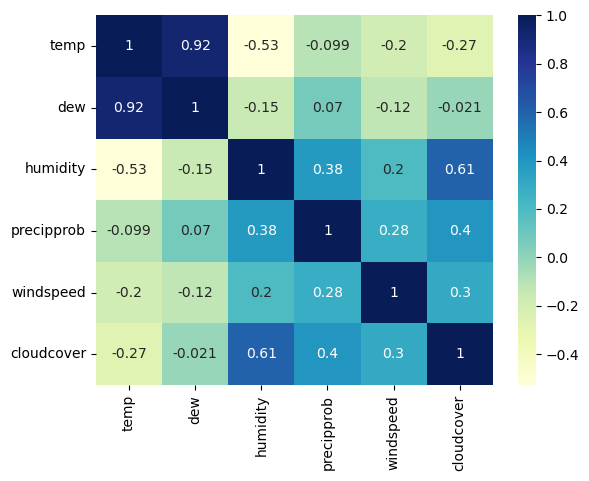

In [19]:
sns.heatmap(df[selected_cols].corr(), cmap='YlGnBu', annot=True)

# Test stationarity

In [20]:
# Stationarity Test
def test_stationarity(timeseries):
  result = adfuller(df['temp'])
  print('ADF Statistic:', result[0])
  print('p-value:', result[1])
  print('Critical Values:', result[4])
  if result[1] > 0.05:
        print("Time series is NOT stationary.")
  else:
        print("Time series is stationary.")
# Differencing to make the series stationary\
  df['temp_diff'] = df['temp'].diff().dropna()
# Perform ADF test on differenced data
  result_diff = adfuller(df['temp_diff'].dropna())
  print('ADF Statistic (Differenced):', result_diff[0])
  print('p-value (Differenced):', result_diff[1])
  print('Critical Values (Differenced):', result_diff[4])

test_stationarity(df['temp'])

ADF Statistic: -2.742622887630043
p-value: 0.06694856335880897
Critical Values: {'1%': -3.4477686860685, '5%': -2.869216670067509, '10%': -2.570859500573892}
Time series is NOT stationary.
ADF Statistic (Differenced): -14.794239815296423
p-value (Differenced): 2.1478107704101913e-27
Critical Values (Differenced): {'1%': -3.4477686860685, '5%': -2.869216670067509, '10%': -2.570859500573892}


## **Stationarity Testing and Differencing in Time Series**

A **stationary time series** is one where statistical properties such as **mean, variance, and autocorrelation** remain constant over time. Stationarity is crucial for forecasting models like **ARIMA and Prophet**, as these models assume that the underlying data does not change significantly over time.

---

### **Step 1: Augmented Dickey-Fuller (ADF) Test for Stationarity**  

The **ADF test** is used to check whether a time series is stationary. The function `adfuller()` returns important statistics:

- **ADF Statistic**: A test statistic that helps determine stationarity.
- **p-value**: Helps decide whether to reject the null hypothesis \( H_0 \).

#### **Interpreting ADF Test Results:**
- If **p-value > 0.05**, we fail to reject \( H_0 \), meaning the time series is **not stationary**.
- If **p-value <= 0.05**, we reject \( H_0 \), meaning the time series **is stationary**.

📌 **In the given result:**
- **ADF Statistic** = -2.7426
- **p-value** = 0.0669 (> 0.05)  
\
 We have the result: p > 0.05 \
=> {Time series is not stationary}


👉 Since the **p-value is greater than 0.05**, the time series is **not stationary**, meaning its statistical properties change over time.  

---

### **Step 2: First Differencing to Remove Trend**  
When a time series is not stationary, we apply differencing to remove trends.\
Differencing is calculated as:
$$
\text{temp}_{\text{diff1}}(t) = \text{temp}(t) - \text{temp}(t-1)
$$
This transformation helps stabilize the mean and remove trend effects.

In Python, this is done using:

```python
df['temp_diff'] = df['temp'].diff()
```
This calculates the first-order difference of the temperature data.

📌 Applying ADF Test Again After First Differencing:

ADF Statistic (Differenced) = -14.7924

p-value (Differenced) = 2.14e-27 (< 0.05)
👉 Since the p-value is now less than 0.05, the time series has become stationary after first differencing.



In [21]:
df.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,temp_diff
datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-01,"Paris,France",26.5,12.5,18.9,26.5,12.5,18.9,13.7,74.3,0.144,...,3,10,2023-10-01T07:49:34,2023-10-01T19:30:27,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"07149099999,07156099999,07146099999,0715709999...",NaN
2023-10-02,"Paris,France",27.7,14.5,20.7,27.9,14.5,20.7,14.7,71.0,0.000,...,4,10,2023-10-02T07:51:01,2023-10-02T19:28:21,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"07149099999,07156099999,07146099999,0715709999...",1.8
2023-10-03,"Paris,France",22.1,15.0,18.8,22.1,15.0,18.8,13.0,69.9,0.386,...,4,10,2023-10-03T07:52:29,2023-10-03T19:26:16,0.63,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"07149099999,07156099999,07146099999,LFPV,07157...",-1.9
2023-10-04,"Paris,France",18.2,10.2,14.2,18.2,10.2,14.2,9.3,73.2,0.006,...,4,10,2023-10-04T07:53:57,2023-10-04T19:24:10,0.66,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"07149099999,07156099999,07146099999,LFPV,07145...",-4.6
2023-10-05,"Paris,France",19.8,11.0,14.7,19.8,11.0,14.7,9.4,72.1,0.014,...,3,10,2023-10-05T07:55:25,2023-10-05T19:22:06,0.70,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"07149099999,07156099999,07146099999,LFPV,07145...",0.5


# Split the data and apply quickly Prophet model

In [22]:
df.reset_index(inplace=True)

21:42:37 - cmdstanpy - INFO - Chain [1] start processing
21:42:37 - cmdstanpy - INFO - Chain [1] done processing


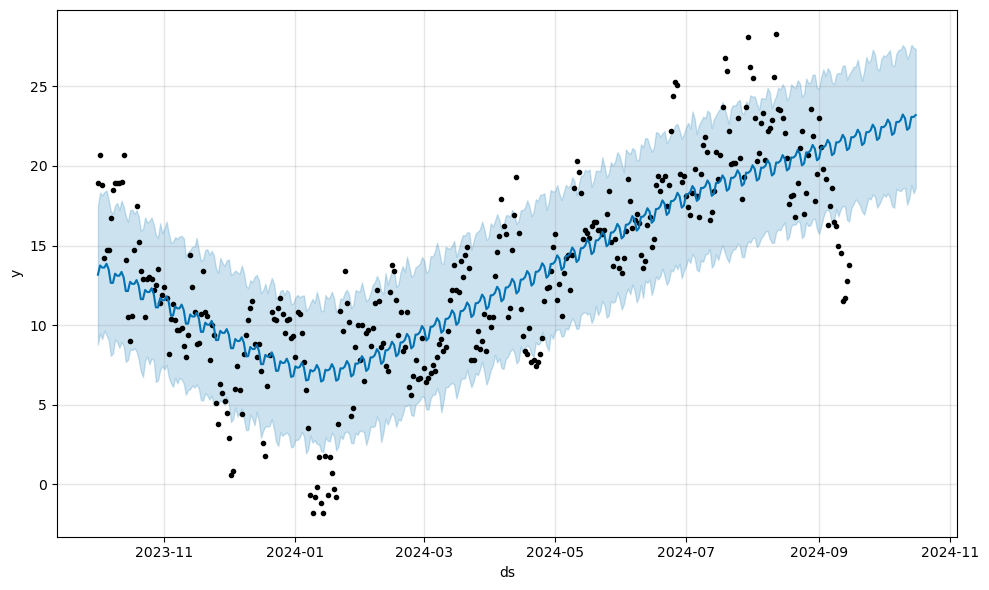

In [23]:
df_prophet = df[['datetime', 'temp']].rename(columns={'datetime': 'ds', 'temp': 'y'})

# Split the data into train and test set
train = df_prophet[df_prophet['ds'] <= '2024-09-15']
test = df_prophet[df_prophet['ds'] > '2024-09-15']

model = Prophet()
model.fit(train)

# Make predictions
future = model.make_future_dataframe(periods=len(test),freq='D')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.show()

In [24]:
# Evaluate the model
y_true = test['y'].values
y_pred = forecast['yhat'][-len(test):].values

# Calculate RMSE, R2, and MAPE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")

RMSE: 8.900814105805487
R2: -7.307970110192187
MAPE: 0.6730341926026772


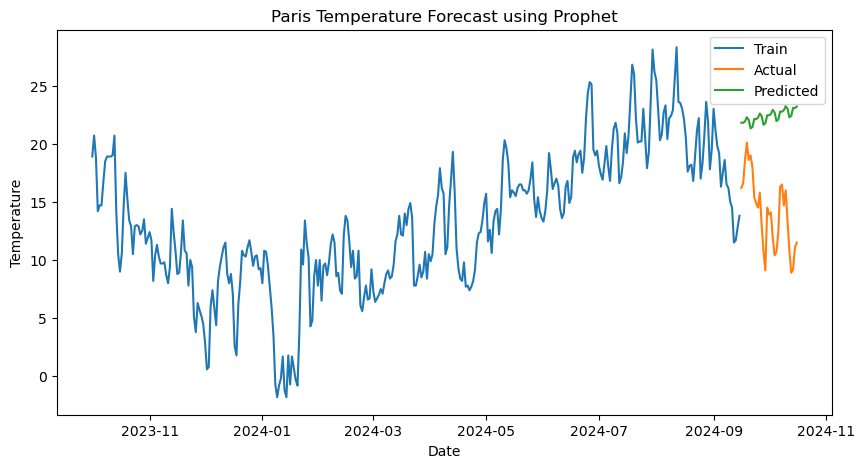

In [25]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], forecast['yhat'][-len(test):], label='Predicted')
plt.title('Paris Temperature Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

==> Evaluate:
- The Prophet model may not be appropriate for this data or may need further tuning.

- There may be a lag in the data or too much volatility making it difficult for the model to capture trends.

- The data may need additional features to improve the forecast.